In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the csv file and store into dataFrame
anuran = pd.read_csv('frogs_mfcc.csv', sep = ',')
anuran.sample(10)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Species
2504,1.0,0.471500,0.336141,0.549922,0.147688,-0.030319,-0.114591,0.080971,0.343027,0.065856,...,-0.088931,-0.235663,0.095232,0.171208,0.054965,-0.069149,-0.103071,0.082186,0.181171,AdenomeraHylaedactylus
3523,1.0,0.647042,0.294094,0.507794,0.276855,0.116487,-0.031077,0.026807,0.262280,0.089025,...,-0.069990,-0.241599,0.031215,0.209294,-0.012787,-0.151066,-0.157759,-0.001782,0.206350,AdenomeraHylaedactylus
6681,1.0,0.160465,0.504079,0.318194,-0.199976,0.252327,0.276102,-0.146052,0.030872,0.073835,...,0.043431,-0.187686,-0.070828,0.021217,-0.061615,-0.025032,0.145323,0.118268,-0.106270,LeptodactylusFuscus
7073,1.0,0.007672,0.673626,0.547413,0.006730,-0.042175,-0.055827,0.161402,0.176052,-0.141410,...,-0.017208,-0.017927,0.005293,0.045594,0.018673,-0.043305,-0.024019,0.004401,0.017167,ScinaxRuber
2337,1.0,0.218557,0.178016,0.511516,0.211941,-0.077130,-0.178175,0.128607,0.282155,0.034959,...,-0.082389,-0.168533,0.092026,0.085569,-0.086251,-0.118987,-0.051094,0.131641,0.132789,AdenomeraHylaedactylus
6782,1.0,0.429172,0.629307,0.363538,-0.323375,0.304192,0.502964,-0.205526,-0.119539,0.278865,...,0.150368,-0.318703,-0.081409,0.224658,-0.112559,-0.055539,0.178733,0.051521,-0.148365,LeptodactylusFuscus
1772,1.0,0.315262,0.204063,0.508230,0.168261,0.060893,-0.141641,0.071105,0.267415,0.067848,...,-0.054623,-0.239328,0.062932,0.207322,0.076735,-0.060686,-0.155519,-0.002102,0.205664,AdenomeraHylaedactylus
5653,1.0,0.464395,0.439797,0.222804,0.012015,0.154812,0.063735,-0.027559,0.086502,0.084872,...,-0.017729,-0.007653,0.060043,0.017316,-0.009992,0.029233,-0.001252,-0.018447,0.032285,HypsiboasCordobae
4461,1.0,0.178955,0.168598,0.579480,0.247093,0.026325,-0.166979,0.004874,0.243459,-0.006683,...,-0.303926,-0.219304,0.264459,0.234869,-0.112702,-0.198619,-0.068150,0.159414,0.158202,AdenomeraHylaedactylus
1567,1.0,0.114564,0.126117,0.522833,0.144380,0.062617,-0.131767,0.045967,0.340361,0.093632,...,-0.124331,-0.234846,0.114554,0.200878,-0.029725,-0.132805,-0.173135,0.071471,0.260414,AdenomeraHylaedactylus


In [3]:
############################################################################
#                          Split the dataset
############################################################################
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

seed_num = 0

# Seperate the data into dependent and independent variables
X = anuran.drop(['Species'], axis = 1)
y = anuran['Species'].values
print(X.shape)
print(y.shape)

# Scale and normalize the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Divide the dataset: 80% for training set and 20% for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed_num)

(7195, 22)
(7195,)


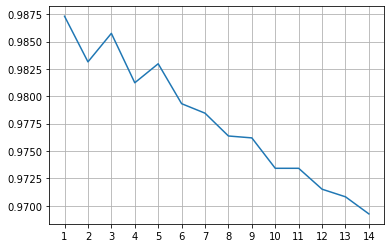

The best value of k is 1 with score 0.9873175816539264


In [4]:
############################################################################
#             Determine the best value of k using cross validation
############################################################################
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

scores = []
maxScore = 0
bestK = 0

for k in range(1,15):
    knnModel = KNeighborsClassifier(n_neighbors=k)   # Default metric: minkowski with p=2
    knnModel.fit(X_train, y_train)
    score = cross_val_score(knnModel, X_train, y_train, cv=4)  # Use cross_val_score to find the k parameter
    score = np.mean(score)
    if maxScore < score:
        maxScore = score
        bestK = k
    scores.append(score)
    
plt.plot(np.arange(1,15), scores)
plt.xticks(np.arange(1,15))
plt.grid()
plt.show()
print("The best value of k is", bestK, "with score", max(scores))

In [5]:
############################################################################
#                          Performance metrics
############################################################################
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knnModel = KNeighborsClassifier(n_neighbors=bestK)
knnModel.fit(X_train, y_train)

y_pred = knnModel.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(" ")
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print(" ")
print('Classification report:')
print(classification_report(y_test, y_pred))
print(" ")

Accuracy: 0.9861014593467686
 
Confusion matrix:
[[137   0   0   0   0   1   1   0   0   0]
 [  0 696   0   0   0   0   0   0   0   0]
 [  0   0  95   0   0   0   0   0   0   0]
 [  1   0   0  67   0   0   0   0   0   0]
 [  0   0   0   0  96   1   0   1   0   0]
 [  0   2   0   1   2 217   2   2   0   0]
 [  0   0   0   0   1   0  52   0   0   0]
 [  0   0   0   0   3   1   1  15   0   0]
 [  0   0   0   0   0   0   0   0  13   0]
 [  0   0   0   0   0   0   0   0   0  31]]
 
Classification report:
                        precision    recall  f1-score   support

        AdenomeraAndre       0.99      0.99      0.99       139
AdenomeraHylaedactylus       1.00      1.00      1.00       696
    Ameeregatrivittata       1.00      1.00      1.00        95
            HylaMinuta       0.99      0.99      0.99        68
  HypsiboasCinerascens       0.94      0.98      0.96        98
     HypsiboasCordobae       0.99      0.96      0.97       226
   LeptodactylusFuscus       0.93      0.98   